# 線形回帰

In [11]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

with open('../data/polynominal_data.txt','r') as f:
    f.readline()
    src = []
    for line in f:
        item = line.strip().split()
        src.append([float(num) for num in item])
    src = np.array(src)

## 1変数単項式回帰

回帰係数= [-0.18427757]
切片： 0.7370179150772291
R^2 = 0.2597012408202035


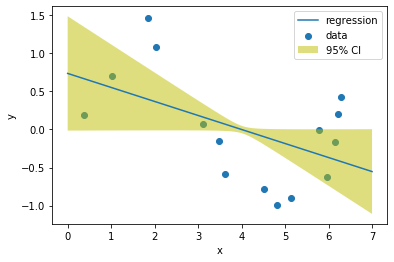

In [12]:
clf = linear_model.LinearRegression()
X = src[:,0].reshape([-1,1])
Y = src[:,1]
clf.fit(X, Y)

print("回帰係数=", clf.coef_)
print("切片：",clf.intercept_)
print("R^2 =",clf.score(X, Y))

plt.scatter(X,Y, label='data')
pred = clf.predict(X)
#plt.plot(X, pred)

from scipy import stats

N = X.shape[0]
S_xx = np.var(X) * N
S_ee = np.dot(Y,Y) - np.dot(pred, pred)
V_eps = S_ee/(N-2)
t_norm = stats.t(df=N-2)
x = np.linspace(0, 7, 100)
pred = clf.predict(x[:,np.newaxis])
plt.plot(x,pred, label='regression')
plt.xlabel('x')
plt.ylabel('y')

bounds = t_norm.ppf(0.975) * np.sqrt( ((1/N + np.power(x-np.mean(X), 2))/S_xx) * V_eps)
plt.fill_between(x,pred+bounds,pred-bounds, facecolor='y',alpha=0.5, label = '95% CI')
plt.legend()
plt.show()

## 1変数多項式回帰

MSE =  0.3599569322957502


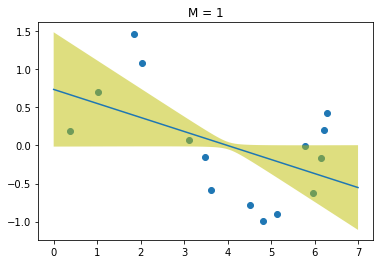

MSE =  0.3172465192807425


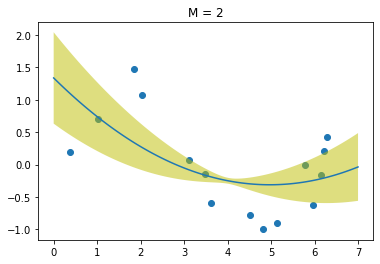

MSE =  0.05321752308228256


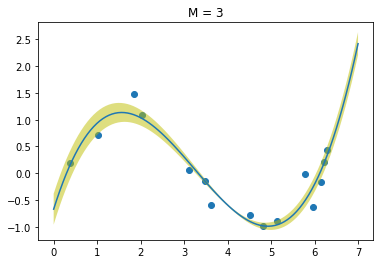

MSE =  0.04941324178982079


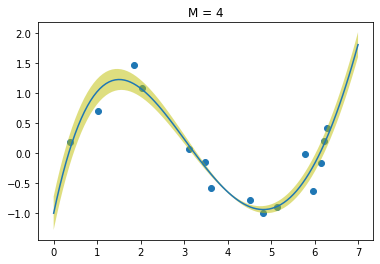

MSE =  0.046117383502603505


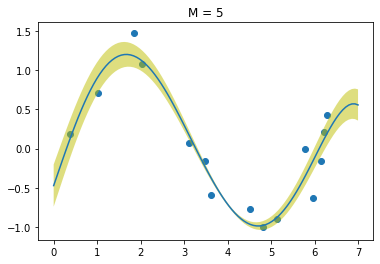

MSE =  0.03620861580188124


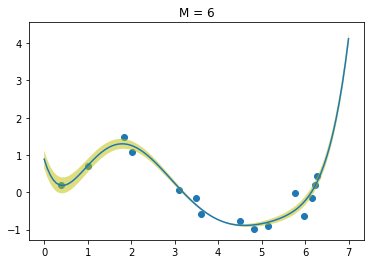

MSE =  0.03616246742575836


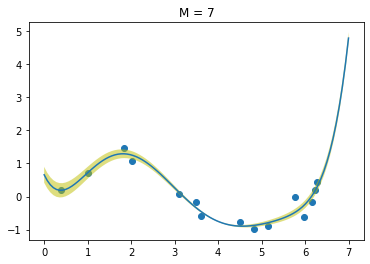

MSE =  0.02648860218894238


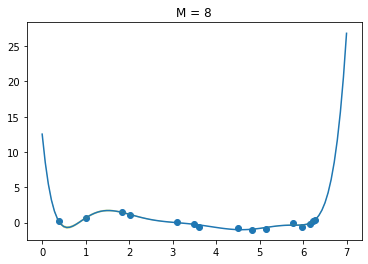

In [13]:

N = X.shape[0]
for r in range(1,9):
    phi = np.array([list(map(lambda x: x**i, X.flatten())) for i in range(r+1)]).T
    theta = np.linalg.inv(np.dot(phi.T, phi)).dot(phi.T).dot(Y.reshape([-1,1]))
    pred = np.dot(phi, theta)
    print("MSE = ",np.mean((Y-pred.flatten())**2))
    plt.scatter(X,Y)

    S_xx = np.var(X) * N
    S_ee = np.dot(Y,Y) - np.dot(pred.flatten(), pred.flatten())
    V_eps = S_ee/(N-2)
    t_norm = stats.t(df=N-2)
    x = np.linspace(0, 7, 100)
    Phi = np.array([list(map(lambda x: x**i, x)) for i in range(r+1)]).T
    pred = np.dot(Phi, theta)
    plt.plot(x,pred)
    plt.title('M = '+str(r))
    bounds = t_norm.ppf(0.975) * np.sqrt( ((1/N + np.power(x-np.mean(X), 2))/S_xx) * V_eps)
    bounds_plot = t_norm.ppf(0.975) * np.sqrt( ((1 + 1/N + np.power(x-np.mean(X), 2))/S_xx) * V_eps)
    plt.fill_between(x, pred.flatten()+bounds,pred.flatten()-bounds, facecolor='y',alpha=0.5)
    plt.show()

### 5-fold cross validation

0.5394579678664775
0.6810067312697268
0.09451505267051677
0.17512716027756184
1.2838345710420782
0.3673283141770628
16.732121140128196
73.27855112347484


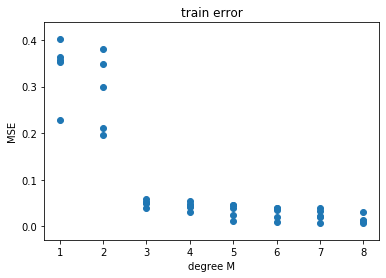

Text(0, 0.5, 'MSE')

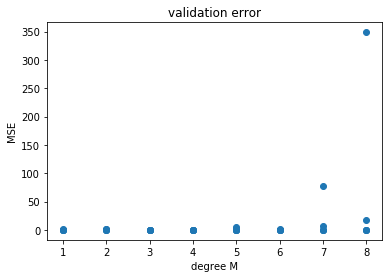

In [15]:
N = X.shape[0]
train_err = []
valid_err = []
X = X.flatten()
for r in range(1,9):
    tmp_train = []
    tmp_valid = []
    for c in range(5):
        X_train = np.concatenate([X[:int(N/5*c)],X[int(N/5 *(c+1)):]])
        Y_train = np.concatenate([Y[:int(N/5*c)],Y[int(N/5 *(c+1)):]])
        X_valid = X[int(N/5*c):int(N/5 *(c+1))]
        Y_valid = Y[int(N/5*c):int(N/5 *(c+1))]
        phi = np.array([list(map(lambda x: x**i, X_train.flatten())) for i in range(r+1)]).T
        theta = np.linalg.inv(np.dot(phi.T, phi)).dot(phi.T).dot(Y_train.reshape([-1,1]))
        pred = np.dot(phi, theta)
        tmp_train.append(np.mean((Y_train-pred.flatten())**2))
        phi_valid = np.array([list(map(lambda x: x**i, X_valid.flatten())) for i in range(r+1)]).T
        pred_valid = np.dot(phi_valid, theta)
        tmp_valid.append(np.mean((Y_valid-pred_valid.flatten())**2))
    train_err.append(tmp_train)
    valid_err.append(tmp_valid)
    print(np.array(tmp_valid).mean())
train_err = np.array(train_err)
valid_err = np.array(valid_err)

plt.scatter(list(range(1,9))*5, train_err.T)
plt.title('train error')
plt.xlabel('degree M')
plt.ylabel('MSE')
plt.show()
plt.scatter(list(range(1,9))*5, valid_err.T)
plt.title('validation error')
plt.xlabel('degree M')
plt.ylabel('MSE')

## 多変数

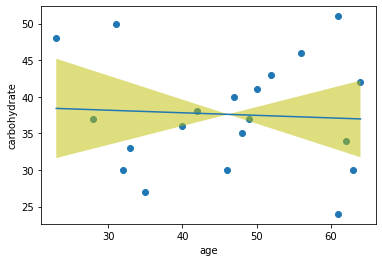

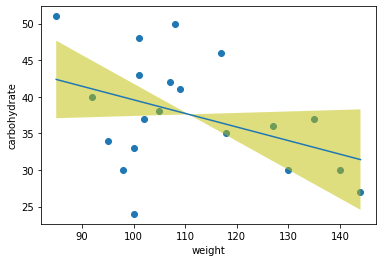

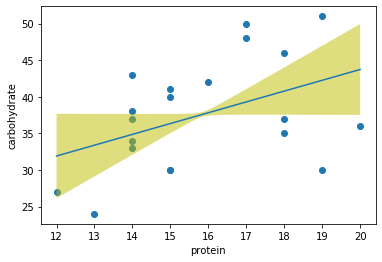

In [7]:
with open('../data/diet_data.txt','r') as f:
    labels = f.readline().split()
    src = []
    for line in f:
        item = line.strip().split()
        src.append([float(num) for num in item])
    src = np.array(src)
y = src[:,0]
N = len(y)
for i in range(1,4):
    x = src[:,i]
    
    plt.figure()
    plt.scatter(x, y)
    plt.xlabel(labels[i])
    plt.ylabel(labels[0])
    
    r=1
    phi = np.array([list(map(lambda x: x**i, x)) for i in range(r+1)]).T
    theta = np.linalg.inv(np.dot(phi.T, phi)).dot(phi.T).dot(y.reshape([-1,1]))
    pred = np.dot(phi, theta)
    
    S_xx = np.var(x) * N
    S_ee = np.dot(y,y) - np.dot(pred.flatten(), pred.flatten())
    V_eps = S_ee/(N-2)
    t_norm = stats.t(df=N-2)
    X = np.linspace(min(x), max(x), 1000)
    Phi = np.array([list(map(lambda x: x**i, X)) for i in range(r+1)]).T
    Pred = np.dot(Phi, theta)
    plt.plot(X,Pred)
    
    bounds = t_norm.ppf(0.975) * np.sqrt( ((1/N + np.power(X-np.mean(x), 2))/S_xx) * V_eps)
    plt.fill_between(X, Pred.flatten()+bounds, Pred.flatten()-bounds, facecolor='y',alpha=0.5)
    
    plt.show()

## leave one out cross validation

['age']
70.40414626017875
['weight']
54.76865778774324
['protein']
56.57892517370685
['age,weight']
64.094547085782
['age,protein']
63.56528638844128
['weight,protein']
42.49810349042251
['age,weight,protein']
46.19114270414438


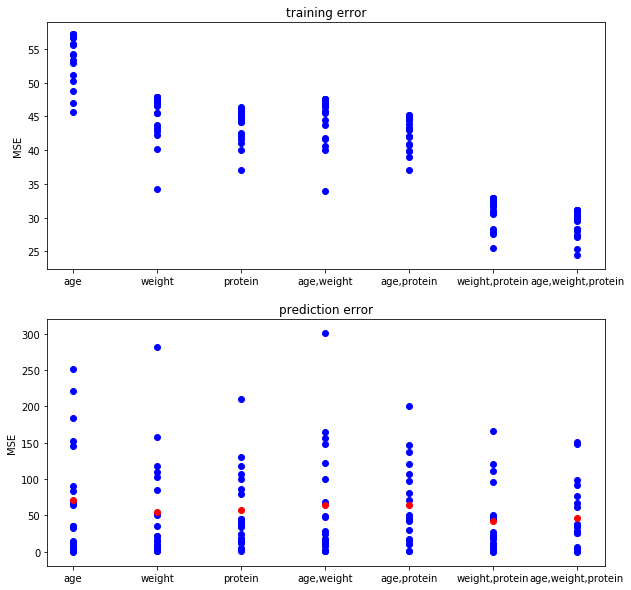

In [8]:
from sklearn.model_selection import LeaveOneOut

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_ylabel('MSE')
ax2.set_ylabel('MSE')
ax1.set_title('training error')
ax2.set_title('prediction error')

lst = [[1],[2],[3],[1,2],[1,3],[2,3],[1,2,3]]
for s in lst:
    clf = linear_model.LinearRegression()
    x = src[:, s]
    label = [','.join([labels[i] for i in s])]
    print(label)
    err_train = []
    err_valid = []
    loo = LeaveOneOut()
    loo.get_n_splits(x)

    for train_index, test_index in loo.split(x): # closs-validation
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(x_train, y_train)
        y_pred_train = clf.intercept_ + np.dot(x_train, clf.coef_.reshape([-1,1])).flatten()
        y_pred_valid = (clf.intercept_ + np.dot(x_test, clf.coef_.reshape([-1,1]))).flatten()

        err_train.append(((y_train - y_pred_train)**2).mean())
        err_valid.append((y_test- y_pred_valid)**2)
    ax1.scatter(label*N, err_train, color='b',)
    ax2.scatter(label*N, err_valid, color='b')
    ax2.scatter(label, np.array(err_valid).mean(), color='r')
    print(np.array(err_valid).mean())
